In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib








In [20]:
df = pd.read_csv("/Users/jein/env/HR_Job_Placement_Dataset.csv")


In [21]:
# Dataset shape (rows, columns)
df.shape

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_years                  51500 non-null  int64  
 1   gender                     51500 non-null  object 
 2   ssc_percentage             48919 non-null  float64
 3   hsc_percentage             49435 non-null  float64
 4   degree_percentage          51500 non-null  float64
 5   degree_specialization      51500 non-null  object 
 6   technical_score            51500 non-null  float64
 7   aptitude_score             51500 non-null  float64
 8   communication_score        51500 non-null  float64
 9   skills_match_percentage    51500 non-null  float64
 10  certifications_count       51500 non-null  int64  
 11  internship_experience      51500 non-null  object 
 12  years_of_experience        51500 non-null  int64  
 13  career_switch_willingness  43034 non-null  obj

In [22]:
# View first few records
df.head()



,age_years,gender,ssc_percentage,hsc_percentage,degree_percentage,degree_specialization,technical_score,aptitude_score,communication_score,skills_match_percentage,...,expected_ctc_lpa,company_tier,job_role_match,competition_level,bond_requirement,notice_period_days,layoff_history,employment_gap_months,relocation_willingness,status
0,27,Male,65.061656,83.842578,75.856526,Computer Science,58.221909,89.566305,64.474484,79.548913,...,5.805850,Tier 3,Not Matched,Medium,Not Required,15.0,No,18.0,Not Willing,Not Placed
1,24,Male,67.885626,64.973305,73.093588,Electronics,71.927978,54.591971,61.077306,73.316134,...,10.807739,Tier 1,Matched,High,Required,0.0,NaN,NaN,Not Willing,Not Placed
2,33,Female,73.892471,68.834121,90.196460,Information Technology,72.445041,58.587088,79.494739,75.466980,...,5.476839,Tier 3,Not Matched,Low,Not Required,0.0,No,3.0,Not Willing,Placed
3,31,Male,74.145568,76.255126,75.586731,Mechanical,78.855676,61.022065,53.740386,73.676449,...,9.980580,Tier 2,Matched,Low,Not Required,0.0,Yes,6.0,NaN,Not Placed
4,28,Male,60.475937,65.786336,80.801010,Information Technology,68.286776,65.713731,61.438314,88.994847,...,8.921233,Tier 2,Matched,Medium,Not Required,0.0,No,3.0,Willing,Not Placed


In [23]:
# View random samples
df.sample(5)


,age_years,gender,ssc_percentage,hsc_percentage,degree_percentage,degree_specialization,technical_score,aptitude_score,communication_score,skills_match_percentage,...,expected_ctc_lpa,company_tier,job_role_match,competition_level,bond_requirement,notice_period_days,layoff_history,employment_gap_months,relocation_willingness,status
42104,25,Male,70.594126,78.516871,71.496777,Others,64.308931,65.193726,68.679821,65.118589,...,13.079975,Tier 3,Matched,High,Required,60.0,Yes,6.0,Willing,Not Placed
35449,22,Male,74.872669,80.218229,82.164638,Others,55.498391,75.147593,61.021097,80.207357,...,3.000000,Tier 1,Not Matched,Medium,Not Required,0.0,No,3.0,Willing,Not Placed
38571,33,Male,64.968263,83.138926,71.591275,Information Technology,61.256766,62.112498,49.336415,72.370909,...,8.066154,Tier 3,Matched,Medium,Not Required,30.0,NaN,0.0,NaN,Not Placed
11151,27,Female,71.605725,68.253710,72.322693,Information Technology,67.480764,59.527280,51.957109,92.677206,...,5.357677,Tier 3,Matched,Low,Required,NaN,Yes,6.0,Willing,Not Placed
43276,30,Male,69.320847,68.753244,69.591412,Others,79.821099,56.996731,74.241784,70.403119,...,4.756963,Tier 2,Matched,Low,Required,60.0,No,0.0,Willing,Placed


In [24]:
df = df.copy()
# Handling missing values Categorical columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0]) 


In [25]:
if 'internship_experience' in df.columns:
    df['internship_experience'] = df['internship_experience'].str.lower().str.strip()

# Encode binary
binary_map = {
    'yes': 1,'no': 0,
    'Willing': 1, 'Not Willing': 0,
    'Relevant': 1, 'Not Relevant': 0,
    'Required': 1, 'Not Required': 0
    
    
}

binary_cols = [
    'internship_experience',
    'career_switch_willingness',
    'relevant_experience',
    'bond_requirement',
    'layoff_history',
    'relocation_willingness'
]

for col in binary_cols:
    df[col] = df[col].map(binary_map)


In [26]:

# Encode nominal columns(OneHotEncoding)
nominal_cols = [
    'degree_specialization',
    'job_role_match'
    
]

df = pd.get_dummies(
    df,
    columns=nominal_cols,
    drop_first=True
)


In [27]:
# Fix labels
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.lower().str.strip()

df['gender'] = df['gender'].map({
    'male': 1,
    'female': 0
})


In [28]:
# Check that everything is numeric
print(df.dtypes)

# Check for missing values
print("Total NaNs:", df.isnull().sum().sum())


age_years                                         int64
gender                                            int64
ssc_percentage                                  float64
hsc_percentage                                  float64
degree_percentage                               float64
technical_score                                 float64
aptitude_score                                  float64
communication_score                             float64
skills_match_percentage                         float64
certifications_count                              int64
internship_experience                             int64
years_of_experience                               int64
career_switch_willingness                       float64
relevant_experience                             float64
previous_ctc_lpa                                float64
expected_ctc_lpa                                float64
company_tier                                     object
competition_level                               

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_years                                     51500 non-null  int64  
 1   gender                                        51500 non-null  int64  
 2   ssc_percentage                                48919 non-null  float64
 3   hsc_percentage                                49435 non-null  float64
 4   degree_percentage                             51500 non-null  float64
 5   technical_score                               51500 non-null  float64
 6   aptitude_score                                51500 non-null  float64
 7   communication_score                           51500 non-null  float64
 8   skills_match_percentage                       51500 non-null  float64
 9   certifications_count                          51500 non-null 

In [30]:
def preprocess_pipeline(df):
    df = df.copy()

    # Missing values
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    cat_cols = df.select_dtypes(include='object').columns

    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


    # Scaling
    scale_cols = [
        'age_years','ssc_percentage','hsc_percentage','degree_percentage',
        'technical_score','aptitude_score','communication_score',
        'skills_match_percentage','years_of_experience',
        'previous_ctc_lpa','expected_ctc_lpa','employment_gap_months'
    ]

    scaler = StandardScaler()
    df[scale_cols] = scaler.fit_transform(df[scale_cols])

    return df


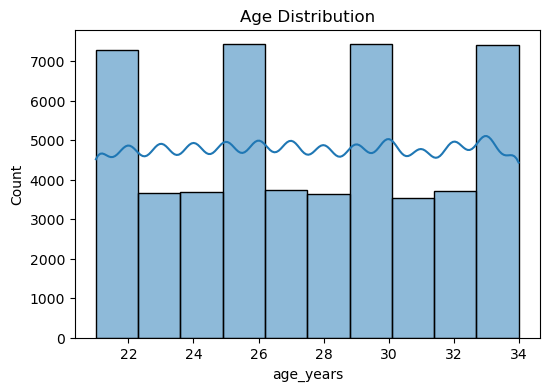

In [ ]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age_years"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()


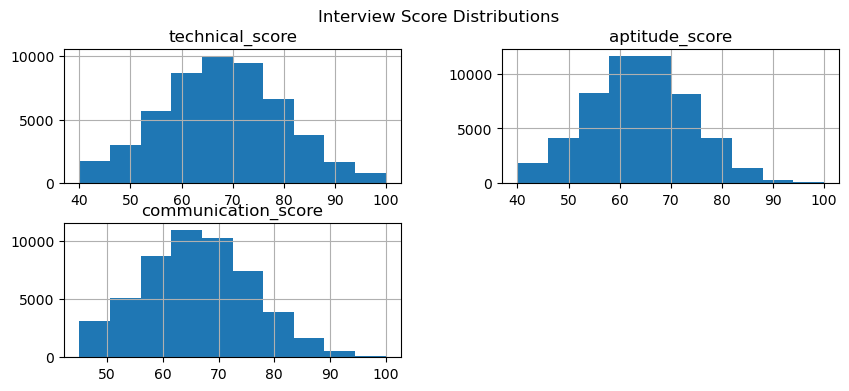

In [ ]:
# Interview score distribution
scores = ["technical_score","aptitude_score","communication_score"]

df[scores].hist(figsize=(10,4))
plt.suptitle("Interview Score Distributions")
plt.show()


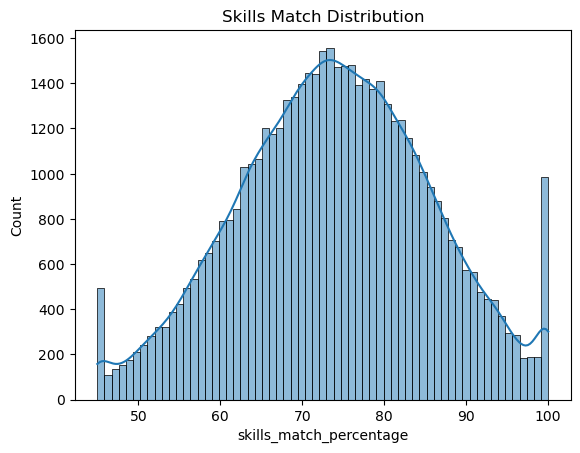

In [ ]:
# skill matched distribution
sns.histplot(df["skills_match_percentage"], kde=True)
plt.title("Skills Match Distribution")
plt.show()


In [ ]:
# satus count
df["status"].value_counts(normalize=True) * 100


status
Not Placed    69.749515
Placed        30.250485
Name: proportion, dtype: float64

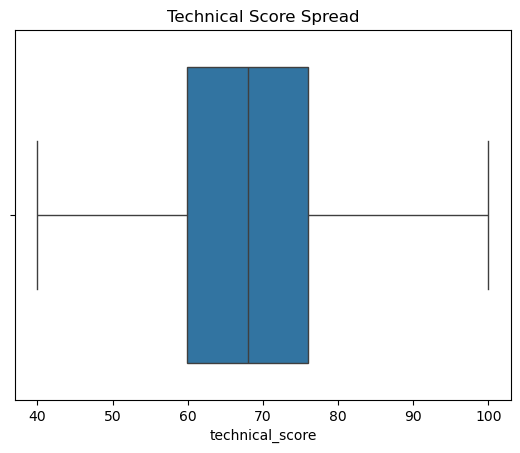

In [ ]:
# technical score spread
sns.boxplot(x=df["technical_score"])
plt.title("Technical Score Spread")
plt.show()


Interview Score vs Job Acceptance

In [41]:
df['interview_avg'] = (
    df['technical_score'] +
    df['aptitude_score'] +
    df['communication_score']
) / 3

df.groupby('status')['interview_avg'].mean()


status
Not Placed    64.694758
Placed        69.163701
Name: interview_avg, dtype: float64

Insight
Candidates with higher interview scores show a significantly higher job acceptance rate.

<!-- Skills Match Percentage Impact on Placement: -->

In [42]:
df.groupby('status')['skills_match_percentage'].mean()


status
Not Placed    72.400721
Placed        77.480871
Name: skills_match_percentage, dtype: float64

Insight
A higher skills match percentage strongly correlates with successful placement

In [43]:
# Convert status to numerical values
df['status'] = df['status'].map({
    'Not Placed': 0,
    'Placed': 1
})


<!-- Company Tier vs Acceptance Rate -->

In [44]:
acceptance_by_tier = (
    df.groupby('company_tier')['status'].mean() * 100
)

acceptance_by_tier


company_tier
Tier 1     29.927544
Tier 1     30.408654
Tier 2     30.369925
Tier 2     32.450331
Tier 3     30.494984
Tier 3     28.712871
Name: status, dtype: float64

<!-- Experience vs Placement Probability -->


In [45]:
df.groupby(pd.cut(df['years_of_experience'], bins=[0,1,3,5]))['status'].mean()


/var/folders/sx/pjd72m7s09x9yyqmn9r08ts40000gn/T/ipykernel_24963/3928075571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['years_of_experience'], bins=[0,1,3,5]))['status'].mean()


years_of_experience
(0, 1]    0.240210
(1, 3]    0.412532
(3, 5]    0.597220
Name: status, dtype: float64

Insight
Acceptance probability increases with experience

<!-- Competition Level vs Job Acceptance -->

In [46]:
df.groupby('competition_level')['status'].mean()


competition_level
High      0.237907
Low       0.318670
Medium    0.318957
Name: status, dtype: float64

Insight
Higher competition levels often lead to lower acceptance rates, as candidates have more alternatives.

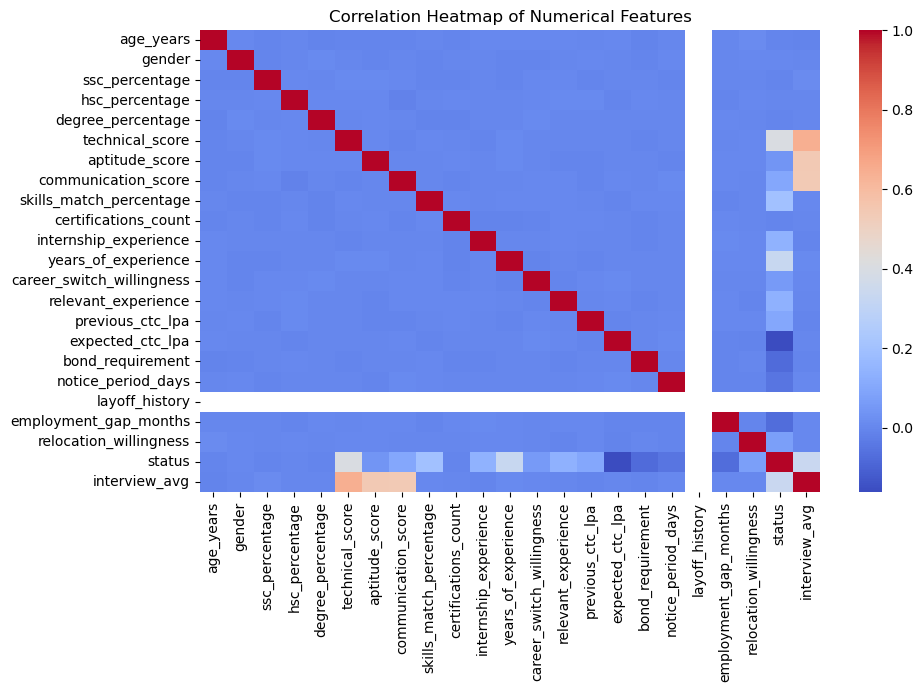

In [47]:
# Correlation Analysis Among Numeric Features

numeric_cols = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Insight
Interview scores and skills match show strong positive correlation with job acceptance

In [ ]:
# Feature Engineering

In [48]:
# Experience Category (Fresher / Junior / Senior) 

df['experience_category'] = pd.cut(
    df['years_of_experience'],
    bins=[-1, 0, 3, 6],
    labels=['Fresher', 'Junior', 'Senior']
)



In [49]:
# Academic Performance Bands
df['academic_band'] = pd.cut(
    df['degree_percentage'],
    bins=[0, 60, 75, 100],
    labels=['Low', 'Medium', 'High']
)


Insight
Candidates in the High academic band show better placement

In [50]:
# Skills Match Level (Low / Medium / High)
df['skills_match_level'] = pd.cut(
    df['skills_match_percentage'],
    bins=[0, 50, 75, 100],
    labels=['Low', 'Medium', 'High']
)


In [51]:
# Interview Performance Category 
df['interview_avg_score'] = (
    df['technical_score'] +
    df['aptitude_score'] +
    df['communication_score']
) / 3

df['interview_performance'] = pd.cut(
    df['interview_avg_score'],
    bins=[0, 60, 80, 100],
    labels=['Low', 'Medium', 'High']
)


In [52]:
# Placement Probability Score 
df['placement_probability_score'] = (
    0.35 * df['skills_match_percentage'] +
    0.30 * df['interview_avg_score'] +
    0.20 * df['degree_percentage'] +
    0.15 * df['years_of_experience']
)


In [53]:
df_new = df.drop(columns=['ssc_percentage', 'hsc_percentage', 'notice_period_days', 'layoff_history', 'employment_gap_months', 'company_tier', 'competition_level', 'career_switch_willingness', 'relevant_experience', 'relocation_willingness'])


In [54]:
print(df_new.dtypes)

# Check for missing values
print("Total NaNs:", df_new.isnull().sum().sum())

age_years                                          int64
gender                                             int64
degree_percentage                                float64
technical_score                                  float64
aptitude_score                                   float64
communication_score                              float64
skills_match_percentage                          float64
certifications_count                               int64
internship_experience                              int64
years_of_experience                                int64
previous_ctc_lpa                                 float64
expected_ctc_lpa                                 float64
bond_requirement                                   int64
status                                             int64
degree_specialization_Electronics                   bool
degree_specialization_Information Technology        bool
degree_specialization_Mechanical                    bool
degree_specialization_Others   

In [55]:
df_new = pd.get_dummies(df_new, columns=['experience_category', 'academic_band', 'skills_match_level', 'interview_performance'])
# print(df_new.head())

In [56]:
df_new.dtypes

age_years                                         int64
gender                                            int64
degree_percentage                               float64
technical_score                                 float64
aptitude_score                                  float64
communication_score                             float64
skills_match_percentage                         float64
certifications_count                              int64
internship_experience                             int64
years_of_experience                               int64
previous_ctc_lpa                                float64
expected_ctc_lpa                                float64
bond_requirement                                  int64
status                                            int64
degree_specialization_Electronics                  bool
degree_specialization_Information Technology       bool
degree_specialization_Mechanical                   bool
degree_specialization_Others                    

In [57]:
print(df.columns)

Index(['age_years', 'gender', 'ssc_percentage', 'hsc_percentage',
       'degree_percentage', 'technical_score', 'aptitude_score',
       'communication_score', 'skills_match_percentage',
       'certifications_count', 'internship_experience', 'years_of_experience',
       'career_switch_willingness', 'relevant_experience', 'previous_ctc_lpa',
       'expected_ctc_lpa', 'company_tier', 'competition_level',
       'bond_requirement', 'notice_period_days', 'layoff_history',
       'employment_gap_months', 'relocation_willingness', 'status',
       'degree_specialization_Electronics',
       'degree_specialization_Information Technology',
       'degree_specialization_Mechanical', 'degree_specialization_Others',
       'job_role_match_Not Matched', 'interview_avg', 'experience_category',
       'academic_band', 'skills_match_level', 'interview_avg_score',
       'interview_performance', 'placement_probability_score'],
      dtype='object')


<!-- Modeling -->

In [58]:
# split train,test
X = df_new.drop('status', axis=1)
y = df_new['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [59]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [60]:
# Model Evaluation

y_pred = log_model.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.8238834951456311
Precision: 0.6657331975560081
Recall   : 0.8392169448010269
F1 Score : 0.7424758659852356

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7184
           1       0.67      0.84      0.74      3116

    accuracy                           0.82     10300
   macro avg       0.79      0.83      0.80     10300
weighted avg       0.84      0.82      0.83     10300



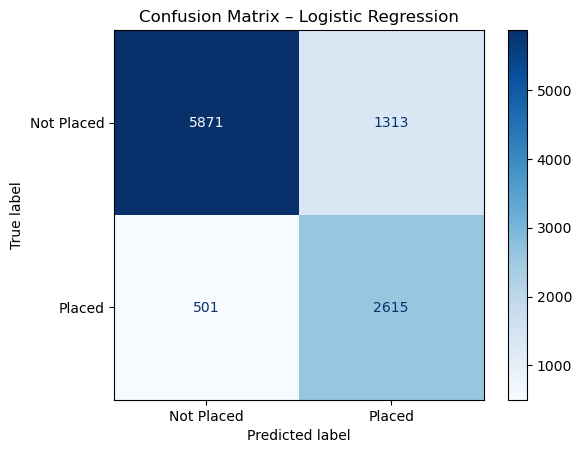

In [61]:
# Confusion Matrix-->

# Predict on test set
y_test_pred = log_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Placed", "Placed"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


TP → Correctly predicted accepted candidates
FP → False acceptance risk
FN → Missed accepted candidates

AUC Score: 0.915


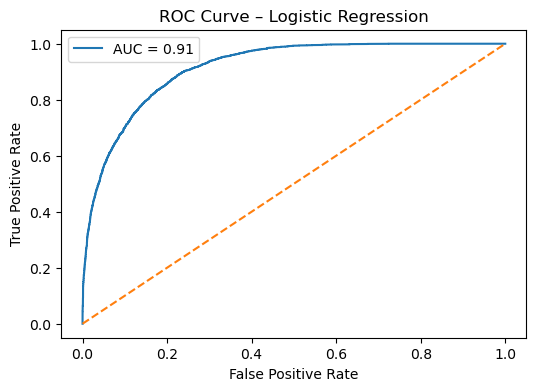

In [62]:

# Predicted probabilities
y_test_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# AUC score
auc_score = roc_auc_score(y_test, y_test_prob)
print("AUC Score:", round(auc_score, 3))

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()



AUC closer to 1.0 → Strong model
AUC ≈ 0.5 → Random guessing

In [63]:


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

grid = GridSearchCV(
    log_reg,
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV AUC:", round(grid.best_score_, 3))

best_model = grid.best_estimator_


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV AUC: 0.92


In [65]:
# Final Evaluation

y_test_pred_best = best_model.predict(X_test_scaled)
y_test_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]

final_auc = roc_auc_score(y_test, y_test_prob_best)
print("Final Test AUC:", round(final_auc, 3))


Final Test AUC: 0.915


In [66]:
# Load model + scaler + feature columns -->prediction_status

model = joblib.load("logistic_job_acceptance_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")


In [67]:
# Prepare feature matrix

X = df.drop('status', axis=1)
X = X.reindex(columns=feature_columns, fill_value=0)
X = X.fillna(0)


In [68]:
# Scale features (Logistic Regression)
X_scaled = scaler.transform(X)


In [69]:
# THIS CREATES THE  predicted_status COLUMN

df_new['predicted_status'] = model.predict(X_scaled)


In [70]:
df_new['predicted_status'].value_counts()


predicted_status
0    36988
1    14512
Name: count, dtype: int64

In [71]:
df_new.groupby('status')['degree_percentage'].mean()


status
0    74.045455
1    73.930978
Name: degree_percentage, dtype: float64

In [72]:
# Skills Match vs Interview Performance 

df_new['interview_avg'] = (
    df_new['technical_score'] +
    df_new['aptitude_score'] +
    df_new['communication_score']
) / 3

df_new[['skills_match_percentage', 'interview_avg']].corr()




,skills_match_percentage,interview_avg
skills_match_percentage,1.000000,0.004246
interview_avg,0.004246,1.000000


Insight:
Strong positive correlation indicates that better skill alignment leads to stronger interview performance.

In [75]:
# Certification Impact on Job Acceptance
df_new.groupby('certifications_count')['status'].mean() *100


certifications_count
0    30.596839
1    30.208451
2    29.989567
3    30.509060
4    30.840665
5    25.744308
6    29.661017
7    15.151515
8    33.333333
Name: status, dtype: float64

Placement & Acceptance Analysis

In [79]:
# Experience vs Placement Success
df_new.groupby(pd.cut(df['years_of_experience'], bins=[0,1,3,5]))['status'].mean()


/var/folders/sx/pjd72m7s09x9yyqmn9r08ts40000gn/T/ipykernel_24963/1689973765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new.groupby(pd.cut(df['years_of_experience'], bins=[0,1,3,5]))['status'].mean()


years_of_experience
(0, 1]    0.240210
(1, 3]    0.412532
(3, 5]    0.597220
Name: status, dtype: float64

Insight:
Placement success increases with experience.

In [47]:
# Employability Test Score Analysis
df_new[['technical_score','aptitude_score','communication_score']].corr()


,technical_score,aptitude_score,communication_score
technical_score,1.000000,0.001488,-0.004010
aptitude_score,0.001488,1.000000,0.000712
communication_score,-0.004010,0.000712,1.000000


Insight
    Technical and communication scores are strong employability predictors.

In [80]:
# Dropout Risk Identification
df_new['dropout_risk'] = df_new['placement_probability_score'].apply(lambda x: 'High' if x < 50 else 'Low')
print(df_new['dropout_risk'])

0        Low
1        Low
2        Low
3        Low
4        Low
        ... 
51495    Low
51496    Low
51497    Low
51498    Low
51499    Low
Name: dropout_risk, Length: 51500, dtype: object


In [81]:
# Bias-Aware Demographic Analysis
df_new.groupby('gender')['status'].mean()


gender
0    0.301007
1    0.304023
Name: status, dtype: float64

In [82]:
df_new.to_csv("job_acceptance_model_data.csv", index=False)

print("After Modeling:", df_new.shape)


After Modeling: (51500, 36)


In [83]:
# predicted_status: 1 = likely accept, 0 = high risk / likely reject
print(df_new[['status', 'predicted_status']].head(10))


print(df_new['predicted_status'].value_counts())

   status  predicted_status
0       0                 0
1       0                 0
2       1                 0
3       0                 0
4       0                 0
5       1                 1
6       1                 1
7       1                 1
8       1                 1
9       0                 0
predicted_status
0    36988
1    14512
Name: count, dtype: int64


“After preprocessing, I used the trained model to generate a predicted_status column, where 1 indicates a candidate likely to accept the offer and 0 indicates high dropout risk.